## Leaky Integrate and Fire Model

Following the arguments of Gerstner et al (2014), we consider a simple resistor/capacitor (RC) circuit model of a neuron integrating current input. The law of current conservation implies
$$
I(t) = I_R + I_C \\
$$
input current $I(t)$ is split into resistive and capacitive current. Ohm's law implies $I_R = u_R/R$ where $u_R = u - u_{\rm rest}$ is the voltage across the resistor. Capacitive current is $I_C = dq/dt = C du/dt$ where we used the definition of capacity $C = q/u$, so that
$$
I(t) = \frac{u(t) - u_{\rm rest}}{R} + C \frac{du}{dt}. \\
$$
Rearranging and defining $\tau_m = RC$ (since $R$ has units of ohms ($\Omega$) and $C$ has units of farads and ohms times farads equals seconds (the curious reader should look this up!), we have:
$$
\tau_m \frac{du}{dt} = - \left[ u(t) - u_{\rm rest} \right] + RI(t), \\
$$
where $u$ is the membrane potential and $\tau_m$ is the membrane time constant.
    Clearly, as the above equation is linear, it will simply filter any input $I(t)$ with some lag. Therefore, to account for the spiking mechanism of natural neurons, we assume that there is a threshold voltage $u_{\rm th}$ at which a *spike* is initiated, followed by a reset of the voltage to the resting potential. This suggests the following conditional reset equation
$$
{\rm if} \ u(t)\geq u_{\rm th} \ {\rm then} \ u(t^+) \mapsto u_{\rm rest},
$$
and any time $t_j$ at which $u(t_j)\geq u_{\rm th}$ is deemed a *spike time*, leading to a vector of spike times $(t_1, t_2, t_3,...)$. You will study this model in detail on HW1.

Below we instantiate python code associated with the above differential equation (these are called lif_mod.py and lif_per.py in the python code folder). Note, we will want to use numerical methods and plotting, and as such we import *numpy* and *matplotlib*.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Now we can refer to any numpy functions using np.* and any matplotlib python plotting functions using plt.*

To begin, let's use Euler's method to solve the above LIF model in the case of a constant current input $I(t) = \bar{I}$. This requires initializing model parameters and running a for-loop. All relevant model parameters are given (units are in comments):

In [598]:
taum = 10    # membrane time constant (ms)
urest = 0   # resting potential (mV)
R = 1       # resistance (ohms)
I = 3      # input current (mA)
uth = 0.5     # spiking threshold (mV)

And simulation parameters are given (relevant units also in comments):

In [599]:
T = 3      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array
tvec = np.linspace(0,T,nt)     # time vector (ms)

u = np.zeros(nt)   # vector of voltage entries (mV)
st = 0             # initialize vector of spike times (ms)

If you're a MATLAB user, you will recognize common MATLAB numerical/vector functions in the above, preceded by *np.*. Now we run the for-loop for Euler's method with the timestep (dt) given above:

In [600]:
for j in np.arange(nt-1):
    u[j+1] = u[j]+dt*(R*I-u[j])/taum;
    if u[j+1]>uth:
        u[j+1]=urest;                   # reset the voltage to resting potential
        st = np.append(st,tvec[j+1])    # add on another spike time

So now, we have the vector *u*, which contains all output voltage values from the simulation. Note, we had to insert an *if* statement to instantiate the reset condition and within this reset condition, we updated the spike time vector (with the append function).

HW-1: 4a
When $I < I_{crit}$: 

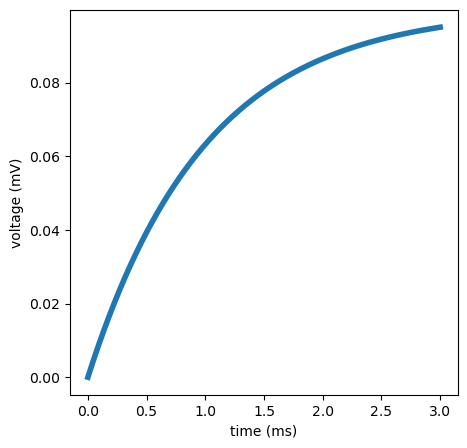

In [41]:
fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot(tvec,u,linewidth=4.0)  # plot command with vectors as arguments
plt.xlabel('time (ms)')         # label for x-axis
plt.ylabel('voltage (mV)')      # label for y-axis
plt.show()                      # needed in order to actually produce the plot for you to see

When $I = I _{crit}$: 

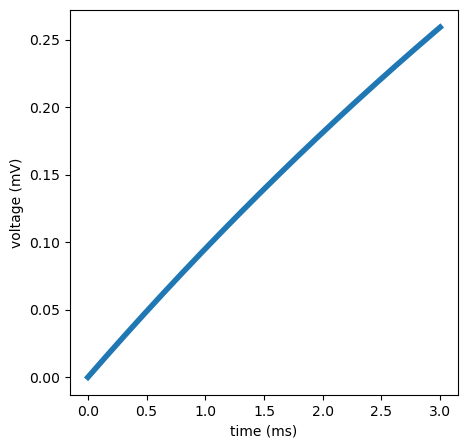

In [583]:
fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot(tvec,u,linewidth=4.0)  # plot command with vectors as arguments
plt.xlabel('time (ms)')         # label for x-axis
plt.ylabel('voltage (mV)')      # label for y-axis
plt.show()                      # needed in order to actually produce the plot for you to see

When $I > I_{crit}$: 

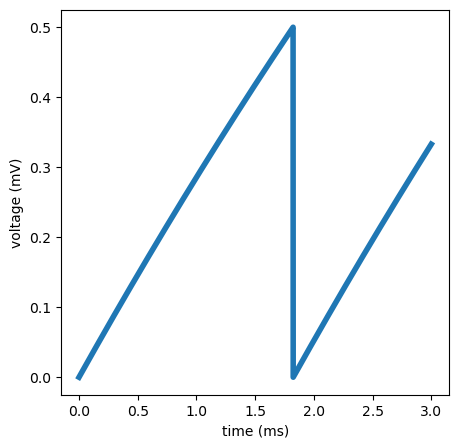

In [601]:
fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot(tvec,u,linewidth=4.0)  # plot command with vectors as arguments
plt.xlabel('time (ms)')         # label for x-axis
plt.ylabel('voltage (mV)')      # label for y-axis
plt.show() 

As $I$ gets closer to $I_{crit}$, we get a linear line going towards the threshold.  

$4b$

$R = 1, \tau_{M} = 10, u_{rest} = 0, u_{th} = 1, u_{start} = 0.5, A = 1$

When $A > A_{min}$: 

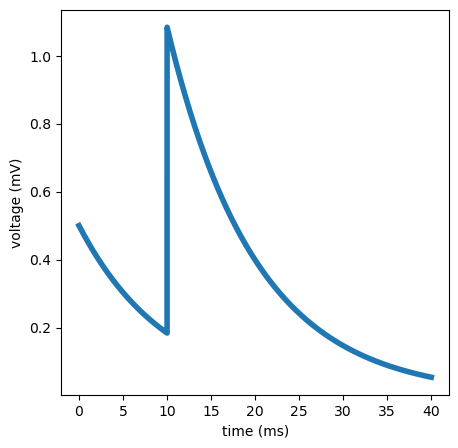

In [20]:
taum = 10    # membrane time constant (ms)
urest = 0   # resting potential (mV)
R = 1       # resistance (ohms)
I = 2       # input current (mA)
uth = 1     # spiking threshold (mV)
A = 9   # current modulation amplitude (mA)

T = 40      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array
tvec = np.linspace(0,T,nt)     # time vector (in ms)

u = [0.5 for i in range(nt)];   # vector of voltage entries

st = 0              # initialize vector to store spike times

tj = 10

for j in np.arange(nt-1):
    u[j+1] = u[j]+dt*(-u[j])/taum;
    
    if j*dt==tj:
        u[j+1]=u[j+1]+A*R/taum
    
#     if u[j+1]>uth:
#         u[j+1]=urest;                   # reset the voltage to resting potential
#         st = np.append(st,tvec[j+1])    # add on another spike time
        
fig = plt.figure(figsize=(5,5))       
plt.plot(tvec,u,linewidth=4.0)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.show()

When $A < A_{min}$: 

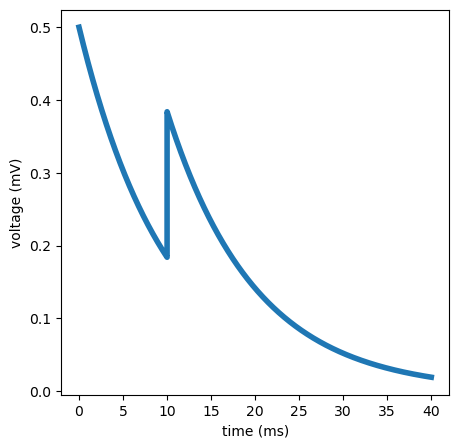

In [440]:
taum = 10    # membrane time constant (ms)
urest = 0   # resting potential (mV)
R = 1       # resistance (ohms)
I = 2       # input current (mA)
uth = 1     # spiking threshold (mV)
A = 2   # current modulation amplitude (mA)

T = 40      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array
tvec = np.linspace(0,T,nt)     # time vector (in ms)

u = [0.5 for i in range(nt)];   # vector of voltage entries

st = 0              # initialize vector to store spike times

tj = 10

for j in np.arange(nt-1):
    u[j+1] = u[j]+dt*(-u[j])/taum;
    
    if j*dt==tj:
        u[j+1]=u[j+1]+A*R/taum
    
    if u[j+1]>uth:
        u[j+1]=urest;                   # reset the voltage to resting potential
        st = np.append(st,tvec[j+1])    # add on another spike time
        
fig = plt.figure(figsize=(5,5))       
plt.plot(tvec,u,linewidth=4.0)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.show()

$4c$

$R = 1, \tau_{M} = 10, u_{rest} = 0, u_{th} = 1, u_{start} = 0, A = 1$

When $T < T_{m}$: 

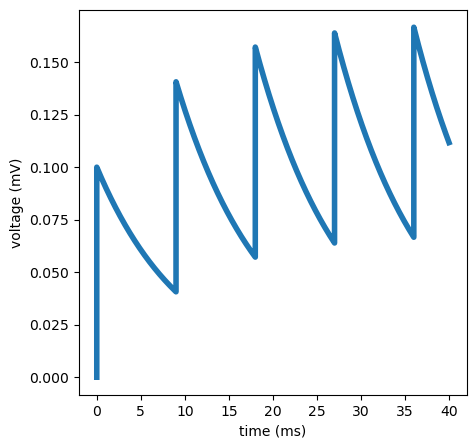

In [16]:
taum = 10    # membrane time constant (ms)
urest = 0   # resting potential (mV)
R = 1       # resistance (ohms)
I = 2       # input current (mA)
uth = 1     # spiking threshold (mV)
A = 1   # current modulation amplitude (mA)

T = 40      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array
tvec = np.linspace(0,T,nt)     # time vector (in ms)

u = np.zeros(nt);   # vector of voltage entries

st = 0              # initialize vector to store spike times

tj = 9         # T time units later 

for j in np.arange(nt-1):               # 
    u[j+1] = u[j]+dt*(-u[j])/taum   # update the voltage
    
    if u[j+1]>uth:
        u[j+1]=urest                    # reset the spike voltage
        st = np.append(st,tvec[j+1])
    
    if j*dt%tj==0:
        u[j+1] = u[j]+dt*(-u[j])/taum +R*A/taum 
        
fig = plt.figure(figsize=(5,5))       
plt.plot(tvec,u,linewidth=4.0)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.show()

When $T > T_{m}$: 

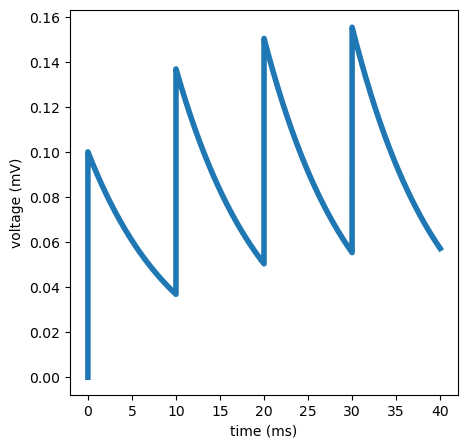

In [13]:
taum = 10    # membrane time constant (ms)
urest = 0   # resting potential (mV)
R = 1       # resistance (ohms)
I = 2       # input current (mA)
uth = 1     # spiking threshold (mV)
A = 1   # current modulation amplitude (mA)

T = 40      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array
tvec = np.linspace(0,T,nt)     # time vector (in ms)

u = np.zeros(nt);   # vector of voltage entries

st = 0              # initialize vector to store spike times

tj = 10


for j in np.arange(nt-1):               # 
    u[j+1] = u[j]+dt*(-u[j])/taum    # update the voltage
    
    if u[j+1]>uth:
        u[j+1]=urest                    # reset the spike voltage
        st = np.append(st,tvec[j+1])
    
    if j*dt%tj==0:
        u[j+1] = u[j]+dt*(R*A-u[j])/taum +R*A/taum
        
        
# for j in np.arange(nt-1):
#     u[j+1] = u[j]+dt*(-u[j])/taum;
    
#     if j*dt<tj:
#         u[j+1]=u[j+1]+A*R/taum
    
#     if u[j+1]>uth:
#         u[j+1]=urest;                   # reset the voltage to resting potential
#         st = np.append(st,tvec[j+1])    # add on another spike time
        
fig = plt.figure(figsize=(5,5))       
plt.plot(tvec,u,linewidth=4.0)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.show()